# Task no.1
***

### Newton's method : Python script to estimate the square root of a float number inserted by the user

Read input number and estimate relevant info (no. decimal places)

In [1]:
no_decimal=0

number= float(input("Insert the desired float number you wish to square root ")) # ask the user the float number
no_decimal= len(str(number).split(".")[1])  # count the number of decimal places of the inserted float number



print ("No of decimal places {} \n\n\n\n".format(no_decimal))


ValueError: could not convert string to float: ''

Define the function  that estimate the square root throught Newton's method

In [ ]:
def my_sqrt(number,tolerance):
    guess = number/2 # first trial for the guessing. Iterate further for approximate the value 

    value= (guess + number/guess)/2 # estimate a new value
    
    while abs(value - guess)>tolerance: 
        guess = value # guess upadated with the new estimate value
        value = (guess + number/guess)/2
    return guess




Run the previous created function and print its original estimation

In [ ]:
tolerance=0.0001
root=my_sqrt(number,tolerance)
print("The estimated square root for the inserted number:{} is {}\n\n\n\n".format(number, root))


The estimated square root for the inserted number:1.2 is 1.0954451212048808






Trim the original estimation for the squared root value and make it agredable with the no. of inserted decimal places of the input number

In [ ]:

root_decimal= x = round(root, no_decimal)

print("The estimated square root with {} decimal places is {}\n\n\n\n".format(no_decimal,root_decimal))


The estimated square root with 1 decimal places is 1.1






# Task no.2
***

### Contingency table 


With the user drink and food preferences a data frame  is constructed. 
<ul>
 <li>Number of people liking Coffee and chocolate biscuits = 43</li>
 <li>Number of people liking Coffee and plain biscuits = 57</li>
  <li>Number of people liking Tea and chocolate biscuits = 56</li>
   <li>Number of people liking Tea and plain biscuits = 45</li>
  </ul>


In [ ]:
import pandas as pd

coffee_choco=[['Coffee','Chocolate']]*43
coffee_plain=[['Coffee','Plain']]*57
tea_choco=[['Tea','Chocolate']]*56
tea_plain=[['Tea','Plain']]*45

preferences=coffee_choco+coffee_plain+tea_choco+tea_plain

drink, food = list(zip(*preferences))

df = pd.DataFrame({'drink': drink, 'food': food})



Create a contingency table with the created dataframe so it would be readable by scipy.stats (python library)

In [ ]:
import scipy.stats as ss

cross = ss.contingency.crosstab(df['drink'], df['food'])
cross.count

array([[43, 57],
       [56, 45]])

Perform a chi-square to the data throught the means of a contingency/frequency table and evaluate the association between both preferences: food and drink.
Chi-square is a statistical hypothesis test that consideres a significance level (p-value) for the rejection/acceptance of null/alternative hypothesis. 
<ul>
 <li>The null hypothesis, commonly refered as &mu;<sub>0</sub> ditactes that there is no association between the tested categorical variables. </li>
 <li>The alternative hypothesis, commonly refered as &mu;<sub>1</sub> ditactes that there is association between the tested categorical variables. </li>
</ul>
The considered p-value was 0.05, thus if p-value is <<<< than 0.05 means that &mu;<sub>0</sub> must be rejected and there is evidence of association between variables. In other hand, if p-value is greater thatn 0.05 the null hyphotesis must be taken meaning no association between both variables: food and drink. 


In [ ]:
chi2_stat, p_val, dof, expected = ss.chi2_contingency(cross.count)
p_val

0.10447218120907394

p-value= 0.104 which means that null hyphotesis can not be rejected, so there is no evidence of association between food prefernce and drink preference

# Task no. 3

In [ ]:
import pandas as pd
from scipy import stats



# Upload data set
data = pd.read_csv('penguins.csv')
#data.head() # to display the first 5 lines of loaded data



# Prepare the data set - remove the nan
data_clean = data.dropna()

# Isolate the data-set per sex
male_penguins = data[data['sex'] == 'MALE']
female_penguins = data[data['sex'] == 'FEMALE']

# Restrict the analysis exclusively to the bodymass
body_male=male_penguins["body_mass_g"]
body_female=female_penguins["body_mass_g"]
#print(body_male)
#print(body_female)


t_stat, p_value=stats.ttest_ind(body_male, body_female)


#Null hypothesis: H0: μ_male = μ_female


# Determine significance
alpha = 0.05
if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis. This means that male a female groups have different body mass averages")
else:
    print("There is no significant evidence to reject the null hypothesis.This means that female and male can have different or equal body mass averages")



There is significant evidence to reject the null hypothesis. This means that male a female groups have different body mass averages


# Task no. 4

#### Part 1 
To prove that setosa class is distinguishable from others class a preliminary assessment is performed by graphically vizualysing the relations between classes. To accomplish that a scatter plot using both libraries matplotlib and seaborn (https://seaborn.pydata.org/tutorial/categorical.html). 


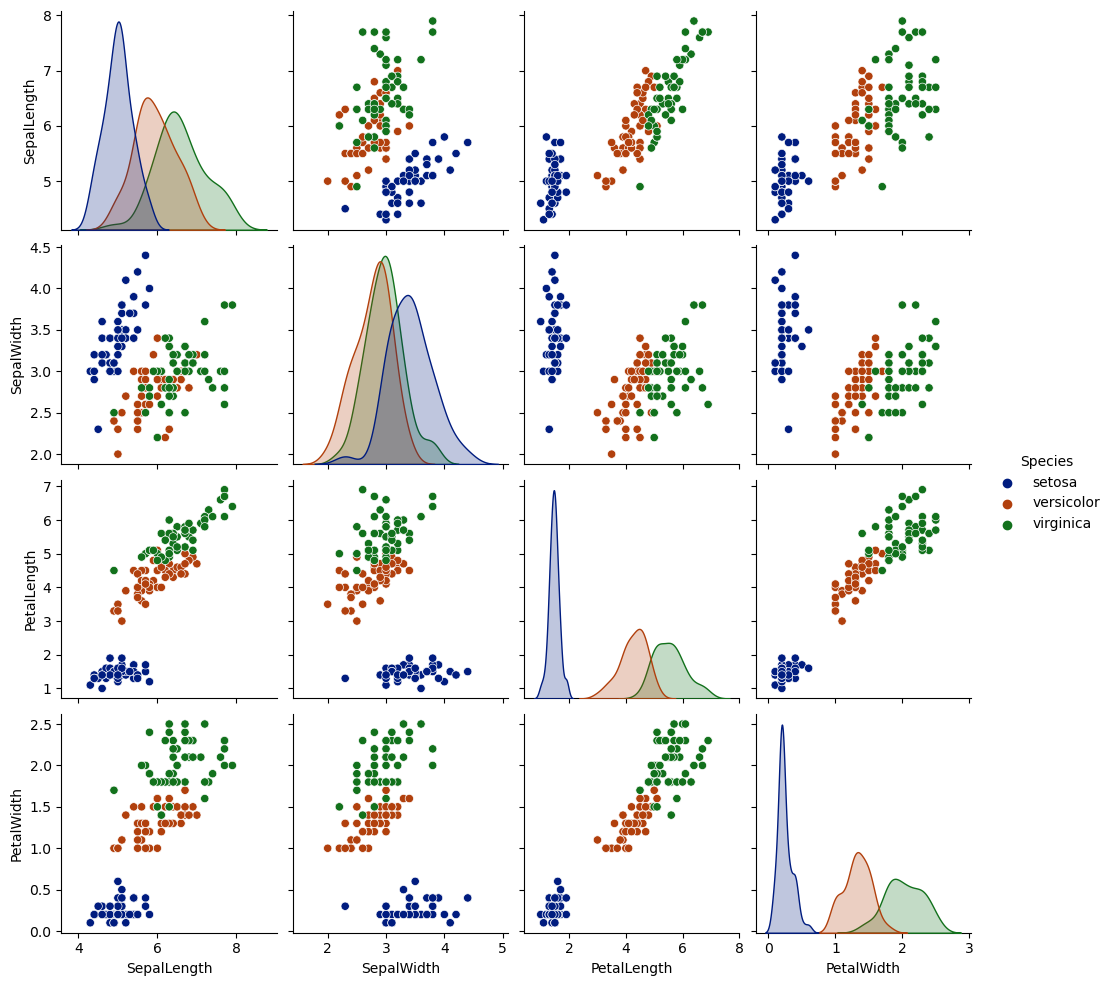

The maximum petal width of Setosa flowers is: 0.6 cm
The maximum petal length of Setosa flowers is: 1.9 cm


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Upload data set
iris_data = pd.read_csv('iris.csv')  
iris_data.head() 




# Assign column names
column_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
iris_data.columns = column_names

# Create pairplot
sns.pairplot(iris_data, hue='Species', palette='dark')
plt.show()



# Drop rows with NaN values and find the maximum PetalWidth value for the setosa class 
iris_data.dropna(inplace=True)
setosa_data = iris_data[iris_data['Species'] == 'setosa']
max_petal_width_setosa = setosa_data['PetalWidth'].max()
print(f"The maximum petal width of Setosa flowers is: {max_petal_width_setosa} cm")

# Drop rows with NaN values and find the maximum PetalWidth value for the setosa class 

max_petal_length_setosa = setosa_data['PetalLength'].max()
print(f"The maximum petal length of Setosa flowers is: {max_petal_length_setosa} cm")


The previous shown scatter plots show that setosa class datapoints are easyly distinguishable of the versicolor and virginica class. For example, one straightforward bondary is the petal widths on the setosa flower, if petal width is lower than 0.6 cm (inclusive)  means that the class flower is setosa. Petal Length is also a good example for the separation of classes, if petal length lower than 1.9 (inclusive) flower class is setosa.

The knn classifier is an alternative to evaluate the separability between setosa and the remain classes. In order to apply this classifier, classes on the dataset were re - classified, setosa flowers remain as it is however the other classes( versicolor and virginica)  were reclassified as "other". A knn was fitted into a training data set and testing data set was used for class prediction and evaluate the classifier dataset

#### Part 2 
The previous shown scatter plots show that setosa class datapoints are easyly distinguishable of the versicolor and virginica class. For example, one straightforward bondary is the petal widths on the setosa flower, if petal width is lower than 0.6 cm (inclusive)  means that the class flower is setosa. Petal Length is also a good example for the separation of classes, if petal length lower than 1.9 (inclusive) flower class is setosa.

The knn classifier is an alternative to evaluate the separability between setosa and the remain classes. In order to apply this classifier data have been re - classified, setosa flowers remain as it is however the other classes

In [94]:
import sklearn as sk 
from sklearn.neighbors import KNeighborsClassifier


iris_data.loc[(iris_data['Species'] == 'versicolor') | (iris_data['Species'] == 'virginica'), 'Species'] = 'other'



# New pair plot considering virginica and versicolor part of "others" class
sns.pairplot(iris_data, hue='Species', palette='dark')
plt.show()


# Knn classifier
clf = sk.neighbors.KNeighborsClassifier()

X = iris_data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
Y= iris_data['Species']


# split data between train and test data set (half - half)
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y)

# fit the model to the train subset
clf.fit(X_train, Y_train)

#use the previous created model to the test subset
clf.predict(X_test)

# estimat the amount of correct classifications 
result=(clf.predict(X_test) == Y_test).sum() / X_test.shape[0]


print(f"The % of of correc predictions is: {result} %" )

The % of of correc predictions is: 1.0 %


Knn algorithm is able to predict all the testing data-set , the percentage of correct prediction was 100 %. 